<a href="https://colab.research.google.com/github/ItsBaiShiXi/MachineLearning_SongPopularity/blob/main/MachineLearning_SongPopularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ItsBaiShiXi/MachineLearning_SongPopularity/main/top_10000_1960-now.csv")
df.head()

Track URI  \
0  spotify:track:1XAZlnVtthcDZt2NI1Dtxo   
1  spotify:track:6a8GbQIlV8HBUW3c6Uk9PH   
2  spotify:track:70XtWbcVZcpaOddJftMcVi   
3  spotify:track:1NXUWyPJk5kO6DQJ5t7bDu   
4  spotify:track:72WZtWs6V7uu3aMgMmEkYe   

                                Track Name  \
0  Justified & Ancient - Stand by the Jams   
1          I Know You Want Me (Calle Ocho)   
2       From the Bottom of My Broken Heart   
3         Apeman - 2014 Remastered Version   
4       You Can't Always Get What You Want   

                           Artist URI(s)      Artist Name(s)  \
0  spotify:artist:6dYrdRlNZSKaVxYg5IrvCH             The KLF   
1  spotify:artist:0TnOYISbd1XYRBk9myaseg             Pitbull   
2  spotify:artist:26dSoYclwsYLMAKD3tpOr4      Britney Spears   
3  spotify:artist:1SQRv42e4PjEYfPhS0Tk9E           The Kinks   
4  spotify:artist:22bE4uQ6baNwSHPVcDxLCe  The Rolling Stones   

                              Album URI  \
0  spotify:album:4MC0ZjNtVP1nDD5lsLxFjc   
1  spotify:album:5xLAcbvbSAlRtPXnKkggXA   
2  spotify:album:3WNxdumkSMGMJRhEgK80qx   
3  spotify:album:6lL6HugNEN4Vlc8sj0Zcse   
4  spotify:album:0c78nsgqX6VfniSNWIxwoD   

                                          Album Name  \
0                                   Songs Collection   
1                     Pitbull Starring In Rebelution   
2     ...Baby One More Time (Digital Deluxe Version)   
3  Lola vs. Powerman and the Moneygoround, Pt. On...   
4                                       Let It Bleed   

                     Album Artist URI(s) Album Artist Name(s)  \
0  spotify:artist:6dYrdRlNZSKaVxYg5IrvCH              The KLF   
1  spotify:artist:0TnOYISbd1XYRBk9myaseg              Pitbull   
2  spotify:artist:26dSoYclwsYLMAKD3tpOr4       Britney Spears   
3  spotify:artist:1SQRv42e4PjEYfPhS0Tk9E            The Kinks   
4  spotify:artist:22bE4uQ6baNwSHPVcDxLCe   The Rolling Stones   

  Album Release Date                                    Album Image URL  ...  \
0         1992-08-03  https://i.scdn.co/image/ab67616d0000b27355346b...  ...   
1         2009-10-23  https://i.scdn.co/image/ab67616d0000b27326d73a...  ...   
2         1999-01-12  https://i.scdn.co/image/ab67616d0000b2738e4986...  ...   
3         2014-10-20  https://i.scdn.co/image/ab67616d0000b2731e7c53...  ...   
4         1969-12-05  https://i.scdn.co/image/ab67616d0000b27373d927...  ...   

   Speechiness  Acousticness  Instrumentalness Liveness  Valence    Tempo  \
0       0.0480        0.0158          0.112000   0.4080    0.504  111.458   
1       0.1490        0.0142          0.000021   0.2370    0.800  127.045   
2       0.0305        0.5600          0.000001   0.3380    0.706   74.981   
3       0.2590        0.5680          0.000051   0.0384    0.833   75.311   
4       0.0687        0.6750          0.000073   0.2890    0.497   85.818   

  Time Signature Album Genres                                Label  \
0            4.0          NaN                  Jams Communications   
1            4.0          NaN  Mr.305/Polo Grounds Music/J Records   
2            4.0          NaN                                 Jive   
3            4.0          NaN                    Sanctuary Records   
4            4.0          NaN                Universal Music Group   

                                          Copyrights  
0  C 1992 Copyright Control, P 1992 Jams Communic...  
1  P (P) 2009 RCA/JIVE Label Group, a unit of Son...  
2                     P (P) 1999 Zomba Recording LLC  
3  C © 2014 Sanctuary Records Group Ltd., a BMG C...  
4  C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ...  

[5 rows x 35 columns]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# ! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download joebeachcapital/top-10000-spotify-songs-1960-now
# !unzip -q /content/top-10000-spotify-songs-1960-now.zip -d /content/dataset_directory

#Data Exploration

In [ ]:
df.shape

(9999, 35)

In [ ]:
columns_to_drop = ['Track Name', 'Album Name', 'Track URI', 'Album URI', 'Artist URI(s)', 'Album Image URL', 'Album Artist URI(s)', 'Disc Number', 'Track Number', 'Track Duration (ms)', 'Track Preview URL', 'ISRC', 'Added By', 'Added At', 'Label', 'Copyrights', 'Album Genres', 'Artist Genres']
df = df.drop(columns_to_drop, axis=1)


In [ ]:
missing_values = df.isnull()
missing_count = missing_values.sum()

print(missing_count)

Artist Name(s)          1
Album Artist Name(s)    2
Album Release Date      2
Explicit                0
Popularity              0
Danceability            2
Energy                  2
Key                     2
Loudness                2
Mode                    2
Speechiness             2
Acousticness            2
Instrumentalness        2
Liveness                2
Valence                 2
Tempo                   2
Time Signature          2
dtype: int64


In [ ]:
df.columns.tolist()

['Artist Name(s)',
 'Album Artist Name(s)',
 'Album Release Date',
 'Explicit',
 'Popularity',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Time Signature']

In [ ]:
# Drop all the duplicated rows
df = df.drop_duplicates()
# Drop all the rows with missing data since there are only
# a small portion of data are missing
df = df.dropna();

In [ ]:
df.describe()

Popularity  Danceability       Energy          Key     Loudness  \
count  9942.000000   9942.000000  9942.000000  9942.000000  9942.000000   
mean     37.585496      0.607795     0.683327     5.171294    -7.266100   
std      29.423781      0.145904     0.191200     3.579430     3.283394   
min       0.000000      0.000000     0.000020     0.000000   -29.368000   
25%       0.000000      0.515000     0.560000     2.000000    -9.060500   
50%      42.000000      0.617000     0.712000     5.000000    -6.515500   
75%      64.000000      0.710000     0.836000     8.000000    -4.881250   
max      98.000000      0.988000     0.997000    11.000000     2.769000   

              Mode  Speechiness  Acousticness  Instrumentalness     Liveness  \
count  9942.000000  9942.000000   9942.000000       9942.000000  9942.000000   
mean      0.698049     0.065154      0.208733          0.029327     0.185550   
std       0.459127     0.061390      0.249082          0.123733     0.148966   
min       0.000000     0.000000      0.000003          0.000000     0.012000   
25%       0.000000     0.033100      0.018325          0.000000     0.089200   
50%       1.000000     0.042900      0.095850          0.000006     0.127000   
75%       1.000000     0.067600      0.318000          0.000551     0.245000   
max       1.000000     0.711000      0.991000          0.985000     0.989000   

           Valence        Tempo  Time Signature  
count  9942.000000  9942.000000     9942.000000  
mean      0.585067   121.502773        3.960270  
std       0.239065    26.269069        0.251603  
min       0.000000     0.000000        0.000000  
25%       0.398000   102.602250        4.000000  
50%       0.596000   120.676500        4.000000  
75%       0.782000   134.341500        4.000000  
max       0.995000   217.913000        5.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9942 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Artist Name(s)        9942 non-null   object 
 1   Album Artist Name(s)  9942 non-null   object 
 2   Album Release Date    9942 non-null   object 
 3   Explicit              9942 non-null   bool   
 4   Popularity            9942 non-null   int64  
 5   Danceability          9942 non-null   float64
 6   Energy                9942 non-null   float64
 7   Key                   9942 non-null   float64
 8   Loudness              9942 non-null   float64
 9   Mode                  9942 non-null   float64
 10  Speechiness           9942 non-null   float64
 11  Acousticness          9942 non-null   float64
 12  Instrumentalness      9942 non-null   float64
 13  Liveness              9942 non-null   float64
 14  Valence               9942 non-null   float64
 15  Tempo                

# Data Plotting

<Axes: >

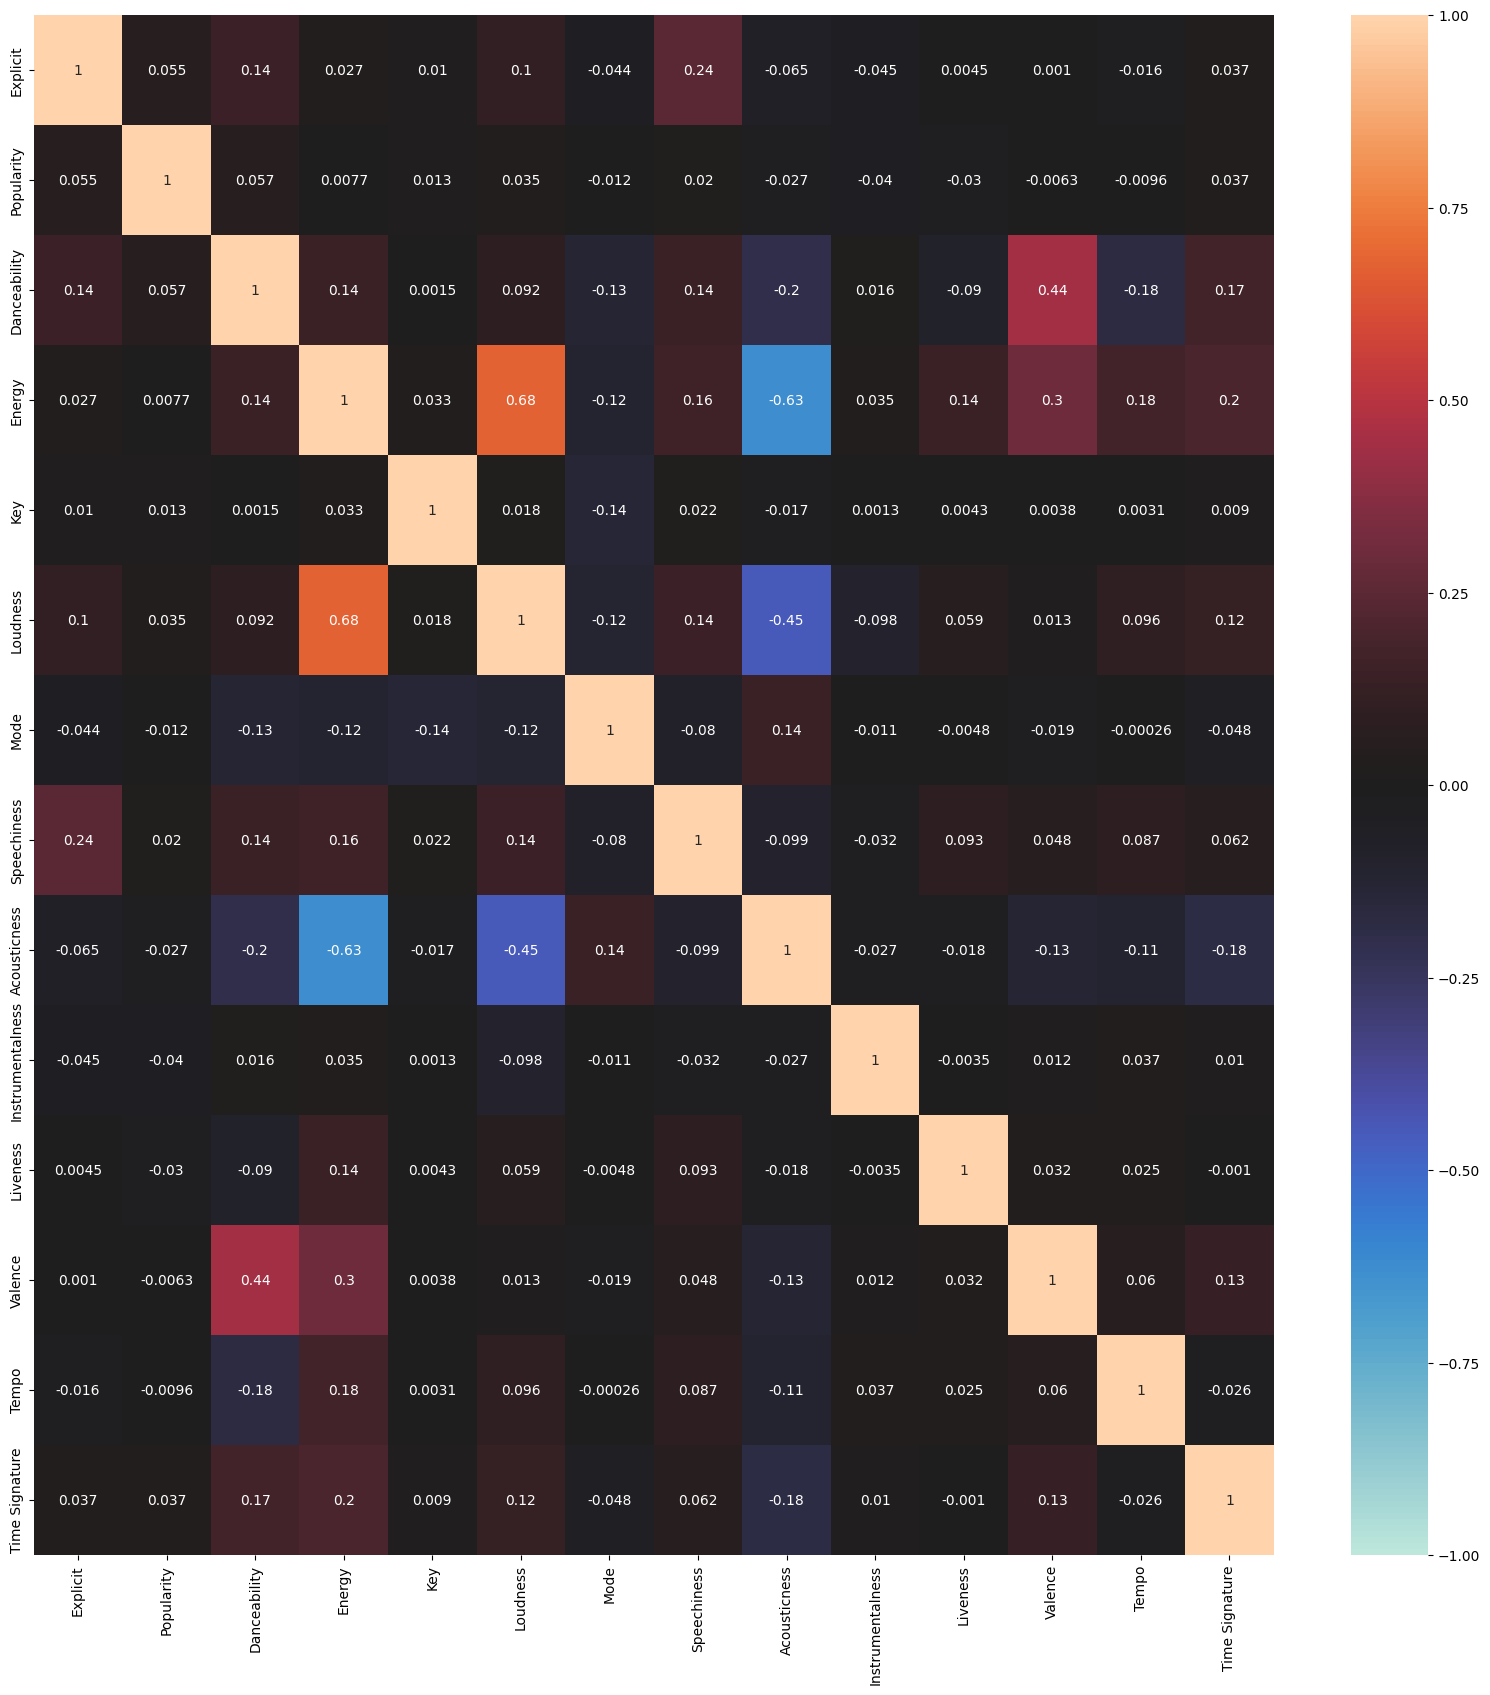

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2g", vmin=-1, vmax=1, center= 0)

<Axes: xlabel='Popularity', ylabel='Count'>

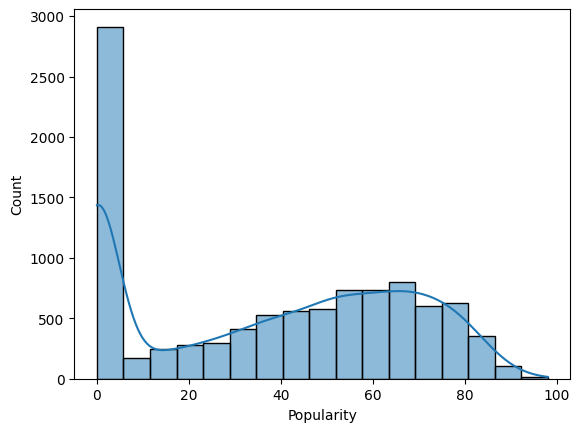

In [ ]:
sns.histplot(df['Popularity'], kde=True)

<Figure size 3000x3000 with 0 Axes>

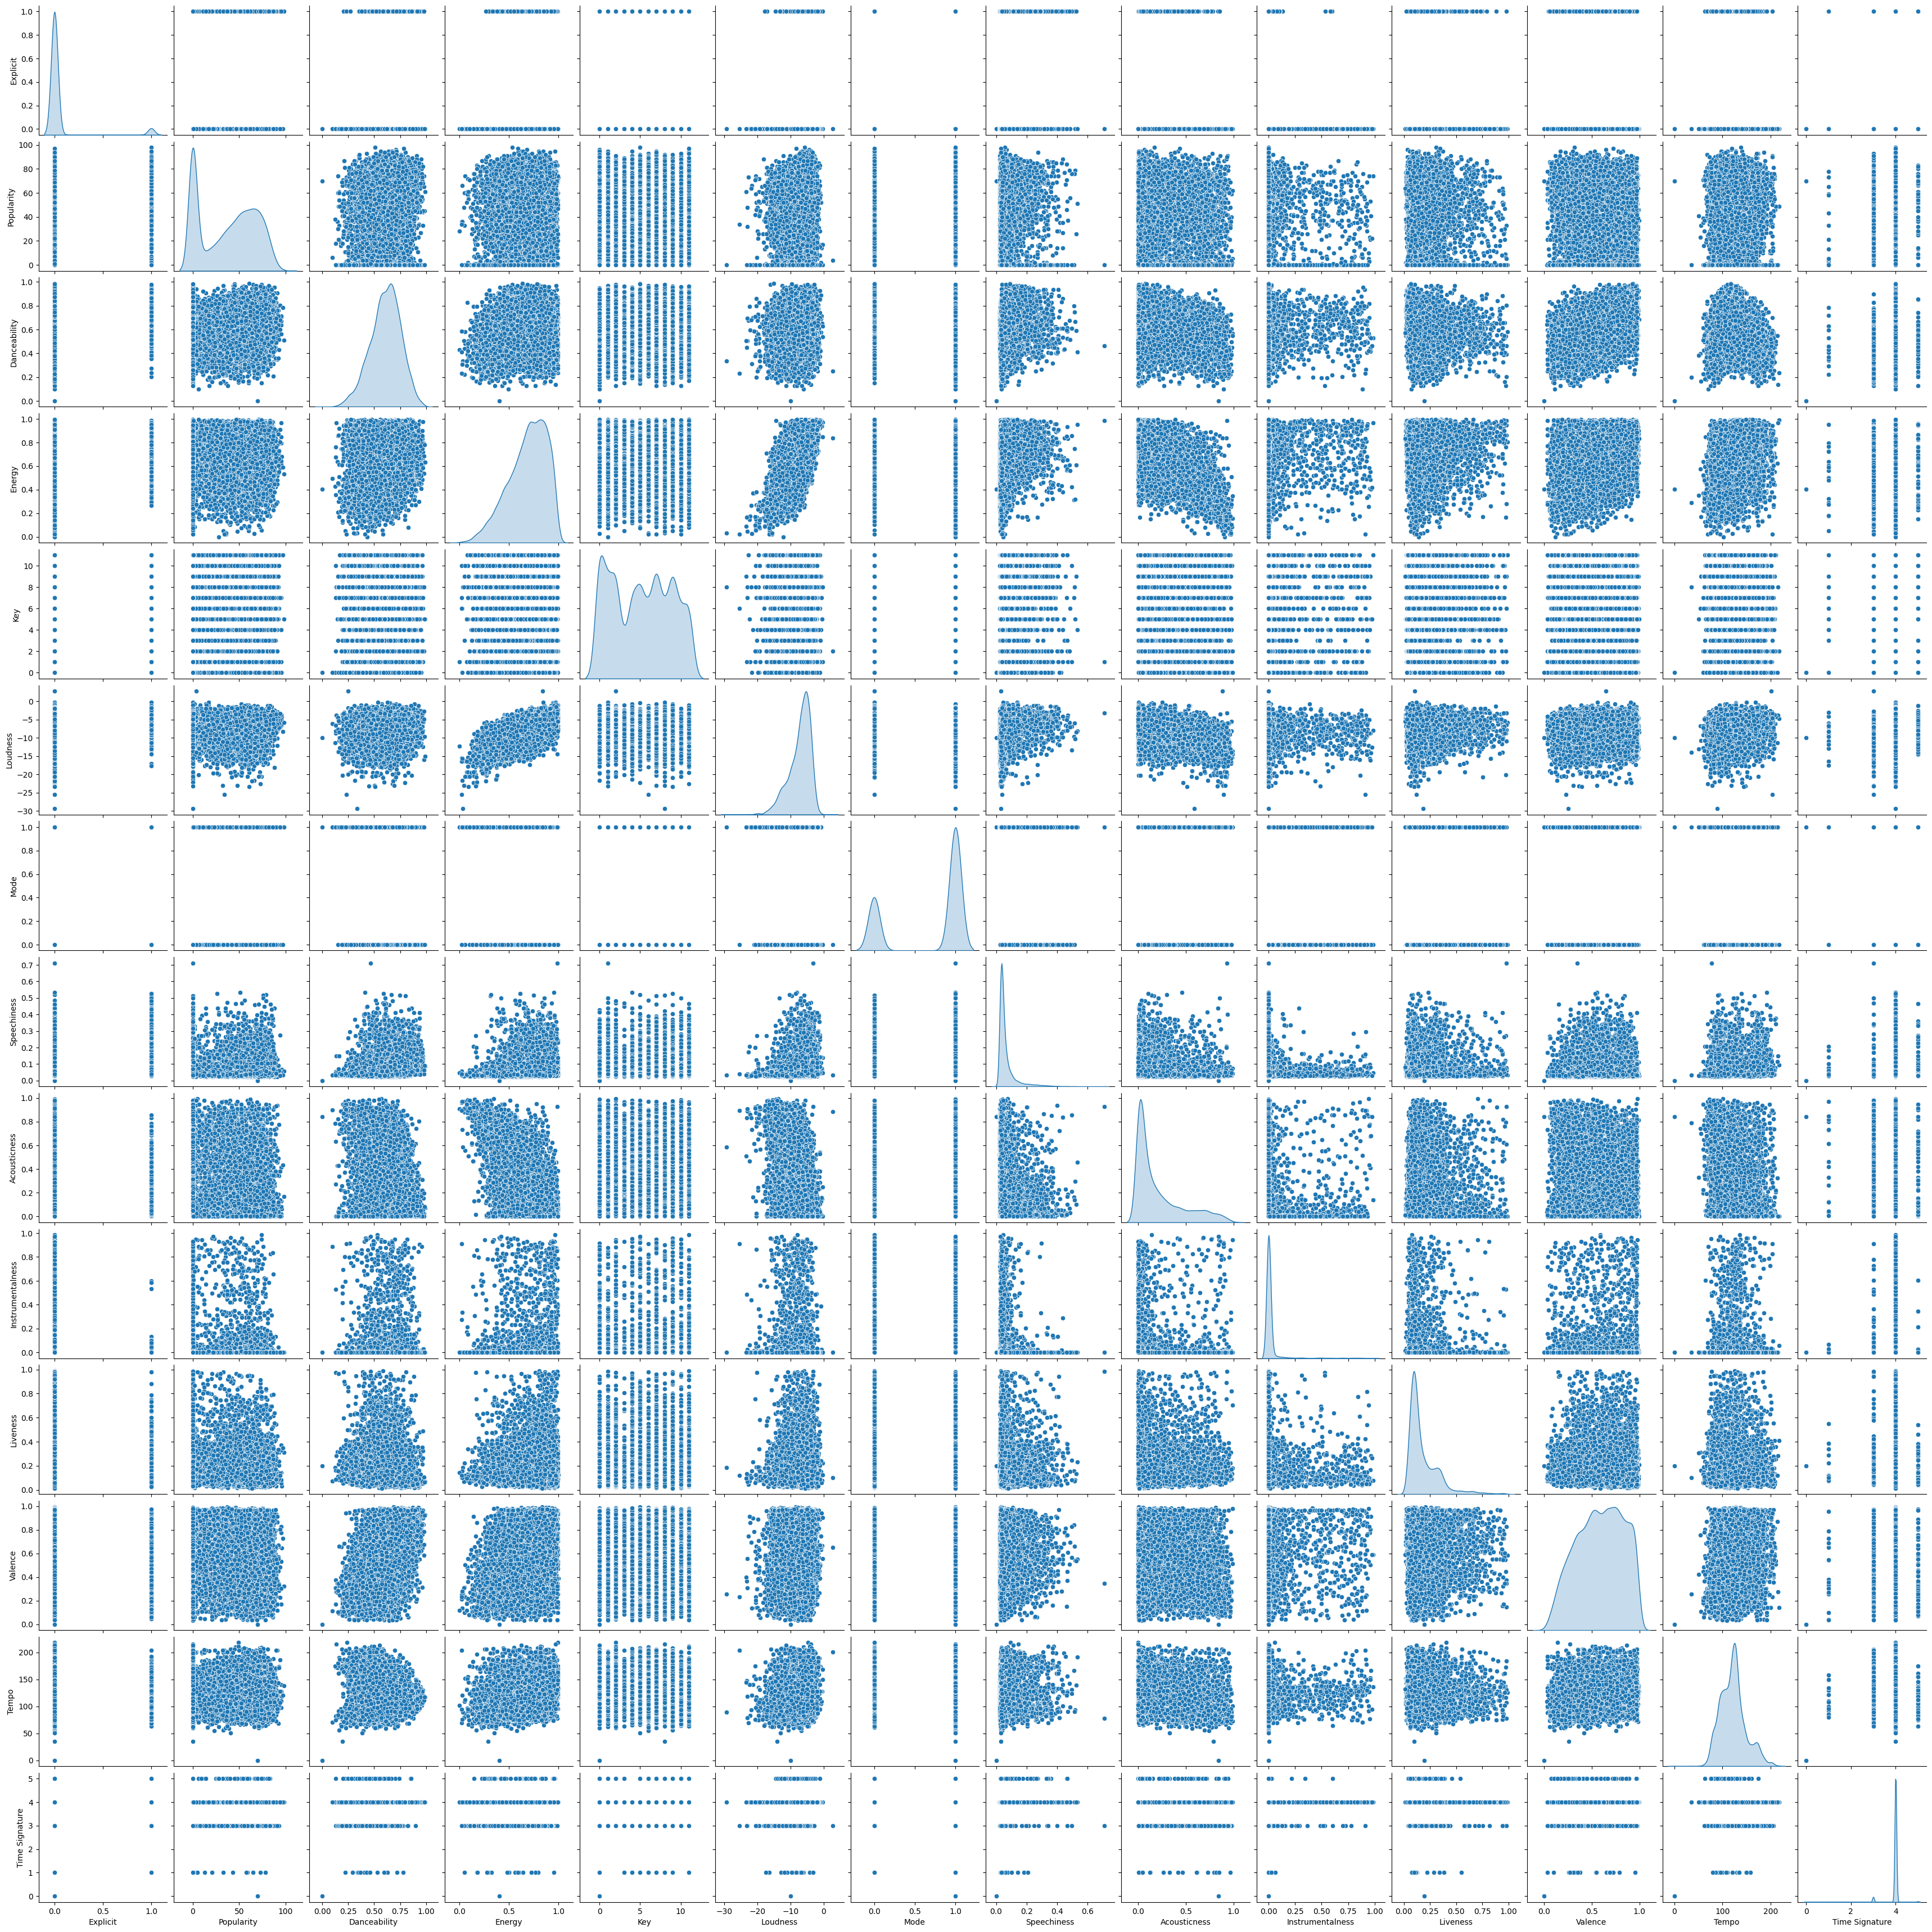

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(df, diag_kind="kde")

# Data Encoding for RF model

In [ ]:
# Since I am applying random forest method to predict the song's popularity
# I think it is easier to split the 0-100 rate scale into 5 categories:
# 0-4 represent 0-20, 21-40, 41-60, 61-80, 81-100 score, and make my model
# predict on which category the song will fall in.
# This should make more sense than trying to predict the exact score.

In [ ]:
rfdf = df

In [ ]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
rfdf['Popularity'] = pd.cut(rfdf['Popularity'], bins=bins, labels=labels, right=False)

label_encoder = LabelEncoder()
rfdf['Popularity'] = label_encoder.fit_transform(rfdf['Popularity'])
rfdf['Popularity']

0       0
1       3
2       2
3       2
4       0
       ..
9994    3
9995    0
9996    3
9997    4
9998    3
Name: Popularity, Length: 9942, dtype: int64

In [ ]:
# I am using label encoding for Artist Name(s) and Album Artist Names(s)
# If I use one-hot encoding, that would make me have more than 7000 columns
# in the end
# I further removed Track name and Album Name due to too many unique values
# removed Album Artist URI(s) since this is similar to Album Artist Names(s)


In [ ]:
# Encode Artist Name(s)
label_encoder = LabelEncoder()
rfdf['Encoded Artist Name(s)'] = label_encoder.fit_transform(rfdf['Artist Name(s)'])
# Matching Table
matching_table = rfdf[['Artist Name(s)', 'Encoded Artist Name(s)']]
print(matching_table)
# Remove original 'Encoded Artist Name(s)' from rfdf
rfdf = rfdf.drop(['Artist Name(s)'], axis = 1)

                    Artist Name(s)  Encoded Artist Name(s)
0                          The KLF                    3612
1                          Pitbull                    2824
2                   Britney Spears                     511
3                        The Kinks                    3620
4               The Rolling Stones                    3709
...                            ...                     ...
9994                    Topic, A7S                    3878
9995                     Vandalism                    3950
9996  Spiller, Sophie Ellis-Bextor                    3303
9997                        Tiësto                    3837
9998                 Kylie Minogue                    2038

[9942 rows x 2 columns]


In [ ]:
# Encode Album Artist Name(s)
label_encoder = LabelEncoder()
rfdf['Encoded Album Artist Name(s)'] = label_encoder.fit_transform(rfdf['Album Artist Name(s)'])
# Matching Table
matching_table = rfdf[['Album Artist Name(s)', 'Encoded Album Artist Name(s)']]
print(matching_table)
# Remove original 'Encoded Artist Name(s)' from rfdf
rfdf = rfdf.drop(['Album Artist Name(s)'], axis = 1)

     Album Artist Name(s)  Encoded Album Artist Name(s)
0                 The KLF                          2858
1                 Pitbull                          2210
2          Britney Spears                           424
3               The Kinks                          2866
4      The Rolling Stones                          2946
...                   ...                           ...
9994           Topic, A7S                          3093
9995            Vandalism                          3150
9996              Spiller                          2592
9997               Tiësto                          3058
9998        Kylie Minogue                          1589

[9942 rows x 2 columns]


In [ ]:
# I will seperate Album Release Date into year, month, and day
# I am assuming each date value has their own impact to the popularity

# Convert the 'Album Release Date' to a pandas datetime object
rfdf['Album Release Date'] = pd.to_datetime(rfdf['Album Release Date'])

rfdf['ReleaseYear'] = rfdf['Album Release Date'].dt.year
rfdf['ReleaseMonth'] = rfdf['Album Release Date'].dt.month
rfdf['ReleaseDay'] = rfdf['Album Release Date'].dt.day

# Drop original 'Album Release Date' object
rfdf = rfdf.drop(['Album Release Date'], axis = 1)

In [ ]:
rfdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9942 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Explicit                      9942 non-null   bool   
 1   Popularity                    9942 non-null   int64  
 2   Danceability                  9942 non-null   float64
 3   Energy                        9942 non-null   float64
 4   Key                           9942 non-null   float64
 5   Loudness                      9942 non-null   float64
 6   Mode                          9942 non-null   float64
 7   Speechiness                   9942 non-null   float64
 8   Acousticness                  9942 non-null   float64
 9   Instrumentalness              9942 non-null   float64
 10  Liveness                      9942 non-null   float64
 11  Valence                       9942 non-null   float64
 12  Tempo                         9942 non-null   float64
 13  Tim

# Divide Data into Train and Test for RF model

In [ ]:
y = rfdf[['Popularity']]
X = rfdf.drop(['Popularity'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Build Basic RF Model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train.squeeze())

RandomForestClassifier()

In [ ]:
print(f'Train Accuracy: {rf_model.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {rf_model.score(X_test, y_test):.3f}')

Train Accuracy: 0.994
Test Accuracy: 0.381


Text(50.722222222222214, 0.5, 'Ground Truth')

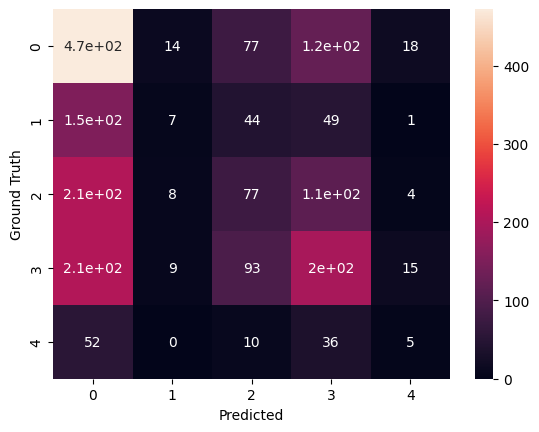

In [ ]:
y_predicted = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_model.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.43      0.67      0.53       703
           1       0.18      0.03      0.05       253
           2       0.26      0.19      0.22       409
           3       0.38      0.38      0.38       521
           4       0.12      0.05      0.07       103

    accuracy                           0.38      1989
   macro avg       0.27      0.26      0.25      1989
weighted avg       0.33      0.38      0.34      1989



# Tried Other methods including, Neural Network, Polynomial Regression and SVM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
model = Sequential()
X = rfdf.drop(['Popularity'], axis=1)
y = rfdf[['Popularity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)
MYACTIVATIONFXN = 'relu'
model.add(Dense(units = 128, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model.add(Dense(units = 64, activation = MYACTIVATIONFXN))
model.add(Dense(units = 32, activation = MYACTIVATIONFXN))
model.add(Dense(units = 16, activation = MYACTIVATIONFXN))
model.add(Dense(units = 1, activation = MYACTIVATIONFXN))
model.compile(optimizer = 'SGD', loss = 'mse')
model.fit(X_train.astype('float'), y_train, batch_size = 15, epochs = 20)

(7953, 18)

(7953, 1)

Epoch 1/20
531/531 [==============================] - 4s 4ms/step - loss: 4.1164
Epoch 2/20
531/531 [==============================] - 1s 3ms/step - loss: 4.1164
Epoch 3/20
531/531 [==============================] - 1s 2ms/step - loss: 4.1164
Epoch 4/20
531/531 [==============================] - 1s 2ms/step - loss: 4.1164
Epoch 5/20
531/531 [==============================] - 1s 2ms/step - loss: 4.1164
Epoch 6/20
531/531 [==============================] - 1s 2ms/step - loss: 4.1164
Epoch 7/20
531/531 [==============================] - 1s 2ms/step - loss: 4.1164
Epoch 8/20
531/531 [==============================] - 2s 4ms/step - loss: 4.1164
Epoch 9/20
531/531 [==============================] - 2s 5ms/step - loss: 4.1164
Epoch 10/20
531/531 [==============================] - 2s 4ms/step - loss: 4.1164
Epoch 11/20
531/531 [==============================] - 2s 3ms/step - loss: 4.1164
Epoch 12/20
531/531 [==============================] - 1s 2ms/step - loss: 4.1164
Epoch 13/20
531/531 [====

In [ ]:
yhat_test = model.predict(X_test.astype('float'))
yhat_test

63/63 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
yhat_test = np.round(yhat_test).astype(int)
yhat_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_test_np = np.array(y_test)
y_test_np

array([[1],
       [0],
       [0],
       ...,
       [3],
       [2],
       [2]])

In [ ]:
from sklearn.metrics import mean_squared_error
y_test_np = np.asarray(y_test).reshape(-1, 1)
mse = mean_squared_error(y_test, yhat_test)
mse

4.135746606334842

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52       703
           1       0.00      0.00      0.00       253
           2       0.00      0.00      0.00       409
           3       0.00      0.00      0.00       521
           4       0.00      0.00      0.00       103

    accuracy                           0.35      1989
   macro avg       0.07      0.20      0.10      1989
weighted avg       0.12      0.35      0.18      1989



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X = rfdf.drop(['Popularity'], axis=1)
y = rfdf[['Popularity']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
for degree in range(1,5):
  poly_features = PolynomialFeatures(degree=degree)
  X_poly = poly_features.fit_transform(X)

  X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state = 21)
  scaler = MinMaxScaler()
  X_poly_train = scaler.fit_transform(X_poly_train)
  X_poly_test = scaler.transform(X_poly_test)

  lin_reg = LinearRegression()
  lin_reg.fit(X_poly_train, y_poly_train)

  yhat_train_pred = lin_reg.predict(X_poly_train)
  yhat_test_pred = lin_reg.predict(X_poly_test)

  testing_mse = mean_squared_error(y_test, yhat_test_pred)
  training_mse = mean_squared_error(y_train, yhat_train_pred)

  yhat_train_pred = lin_reg.predict(X_poly_train)
  yhat_test_pred = lin_reg.predict(X_poly_test)

  testing_mse = mean_squared_error(y_test, yhat_test_pred)
  training_mse = mean_squared_error(y_train, yhat_train_pred)

  print("Degree:", degree)
  print("Training MSE error:", training_mse)
  print("Testing MSE error:", testing_mse)

  # import operator
  # plt.scatter(X_train, y_train, s=10)
  # sort_axis = operator.itemgetter(0)
  # sorted_zip = sorted(zip(X_train_scaled, yhat_train_pred), key=sort_axis)
  # X_poly_train, yhat_train_pred = zip(*sorted_zip)
  # plt.plot(X_poly_train, yhat_train_pred, color='m')
  # plt.show()

Degree: 1
Training MSE error: 1.6668791312296276
Testing MSE error: 1.6953120556889014
Degree: 2
Training MSE error: 1.5807584665109622
Testing MSE error: 1.6877598508260478
Degree: 3
Training MSE error: 1.3590172961663005
Testing MSE error: 2.324425784693864e+18
Degree: 4
Training MSE error: 0.555839579479808
Testing MSE error: 4.168154866285159e+19


In [ ]:
y = rfdf[['Popularity']]
X = rfdf.drop(['Popularity'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train.squeeze())

DecisionTreeClassifier()

In [ ]:
print(f'Train Accuracy: {model.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {model.score(X_test, y_test):.3f}')

Train Accuracy: 0.994
Test Accuracy: 0.293


In [ ]:
print(classification_report(y_test, model.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

           0       0.41      0.38      0.39       703
           1       0.12      0.13      0.13       253
           2       0.24      0.28      0.26       409
           3       0.34      0.31      0.32       521
           4       0.08      0.11      0.09       103

    accuracy                           0.29      1989
   macro avg       0.24      0.24      0.24      1989
weighted avg       0.30      0.29      0.30      1989



In [ ]:
# model = SVC(kernel='poly', degree=3, C=1)
#SVM
from sklearn.svm import SVC
svm_linear = SVC(kernel='poly', degree=3, C=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_linear_train = scaler.transform(X_train)
X_linear_test = scaler.transform(X_test)
svm_linear.fit(X_linear_train, y_train)
print(classification_report(y_test, svm_linear.predict(X_linear_test), zero_division=1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.38      0.83      0.52       703
           1       0.16      0.01      0.02       253
           2       0.18      0.05      0.08       409
           3       0.37      0.21      0.27       521
           4       0.29      0.04      0.07       103

    accuracy                           0.36      1989
   macro avg       0.27      0.23      0.19      1989
weighted avg       0.30      0.36      0.28      1989



In [ ]:
print(f'Train Accuracy: {svm_linear.score(X_linear_train, y_train):.3f}')
print(f'Test Accuracy: {svm_linear.score(X_linear_test, y_test):.3f}')

Train Accuracy: 0.443
Test Accuracy: 0.361
